In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

100%|██████████| 427M/427M [00:02<00:00, 154MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [1]:
train_path="/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"
test_path="/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"

In [3]:
!pip install tensorflow

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization # Changed conv2D to Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model # Removed extra keras.
from glob import glob

In [14]:
import pandas as pd

In [26]:
#visulization
from cv2 import cvtColor
x_data=[]
y_data=[]
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array) # Fixed indentation using spaces
        y_data.append(category.split('/')[-1]) # Fixed indentation using spaces
data=pd.DataFrame({'image':x_data,'label':y_data}) # Corrected typo: DtaFrame to DataFrame

In [19]:
data.shape

(0, 2)

In [22]:
import matplotlib.pyplot as plt


In [34]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Assuming you have set up your train and validation directories
# You will need to replace 'train_data_dir' and 'validation_data_dir' with your actual data paths

train_generator = train_datagen.flow_from_directory(
    'train_data_dir',  # Placeholder for the path to your training data
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    'validation_data_dir',  # Placeholder for the path to your validation data
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50
)

# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'train_data_dir'

In [33]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'path/to/train_data',  # Replace with the path to your training data
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    'path/to/validation_data',  # Replace with the path to your validation data
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50
)

# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


FileNotFoundError: [Errno 2] No such file or directory: 'path/to/train_data'

ValueError: 'labels' must be of length 'x', not 2

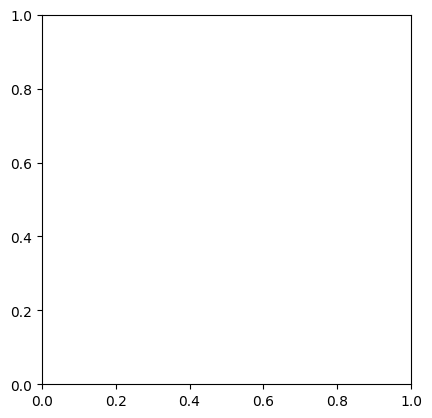

In [23]:
colors=['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(), labels=['Organic', 'Recyclabel'] ,autopct='%0.2f%%', colors=colors, startangle=90, explode=[0.005,0.005])
plt.show()

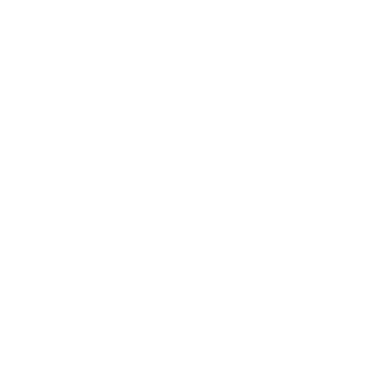

In [24]:
# Get unique labels from your data
unique_labels = data['label'].unique()

# Create labels for the pie chart dynamically
labels = unique_labels

# Adjust colors if needed to match the number of unique labels
colors = ['#a0d157', '#c48bb8', '#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Add more colors if necessary

# Generate the pie chart
plt.pie(data.label.value_counts(), labels=labels, autopct='%0.2f%%', colors=colors[:len(unique_labels)], startangle=90, explode=[0.005] * len(unique_labels))
plt.show()

In [29]:
plt.figure(figsize=(20,15))
for i in range(9):
  plt.subplot(4,3(i%12)+1)
  index=np.random.randint(15000)
  plt.title('this is of(0)'.format(data.label[index]))
  plt.inshow(data.image[index])
  plt.tight_layout()

<>:3: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:3: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<ipython-input-29-bd0d6fcfd82b>:3: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  plt.subplot(4,3(i%12)+1)


TypeError: 'int' object is not callable

<Figure size 2000x1500 with 0 Axes>

In [32]:
model.add(Conv2D(32,(3,3),input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(Maxpooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(Maxpooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(Maxpooling2D())

model.add(Flattern())

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(Dropout(0,5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0,5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])
batch_size=32







NameError: name 'model' is not defined